# IMPORT LIBRARIES

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
# from sklearn.metrics import accuracy_score, root_mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# GET DATA

In [10]:
games = pd.read_csv("../data/games_normalized_clean.csv")

# Models

In [11]:
games_labels = games["Estimated owners"]
games = games.drop("Estimated owners", axis = 1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(games, games_labels, test_size = 0.2, random_state= 42)

In [15]:
gamaes_pca = games[["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"]]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(gamaes_pca, games_labels, test_size = 0.2, random_state= 42)

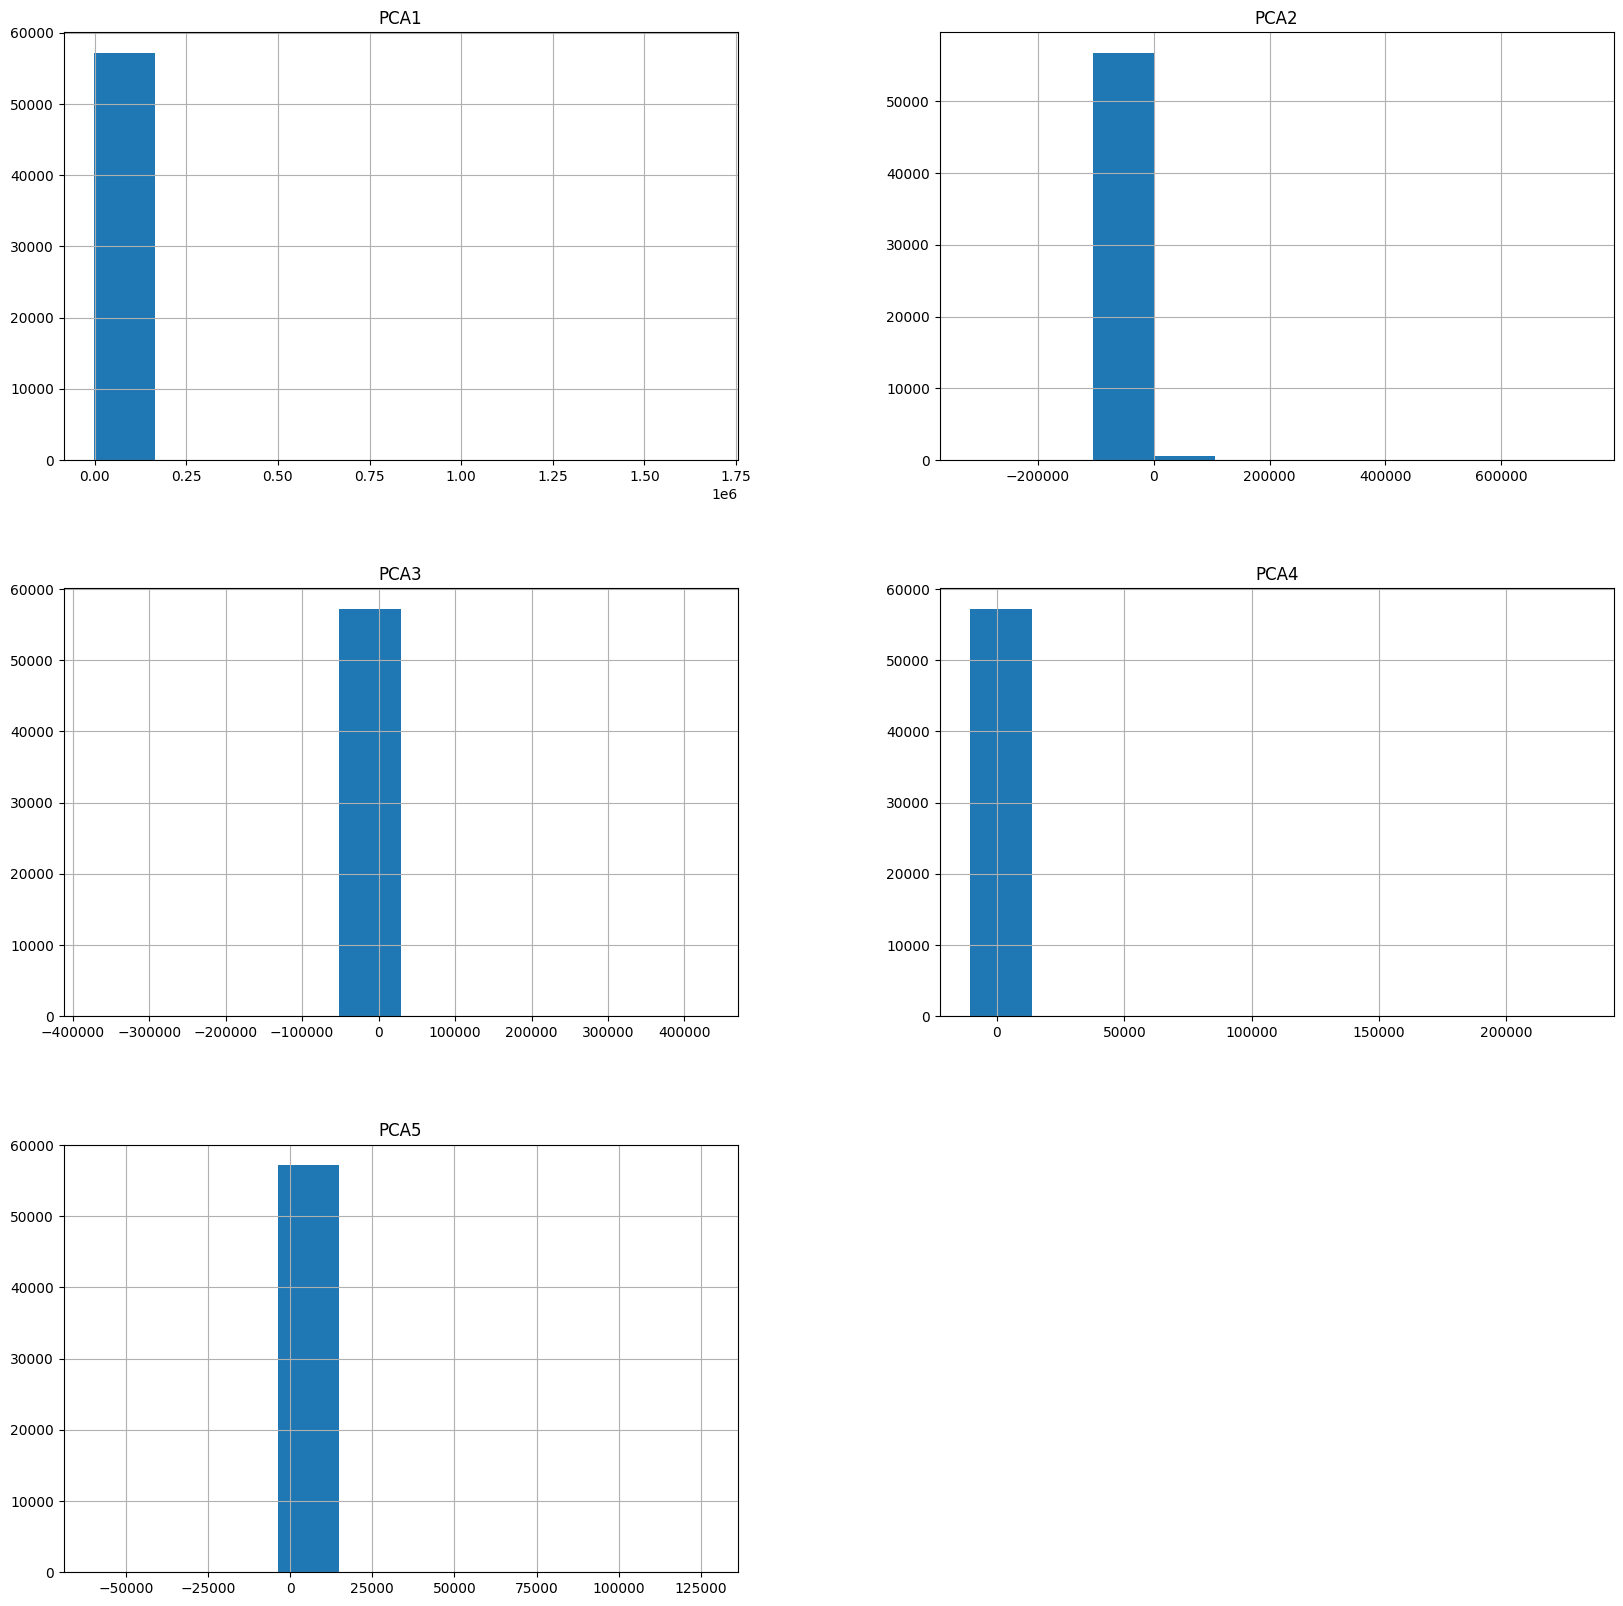

In [17]:
X_train.hist(figsize = (20, 20))
plt.show()

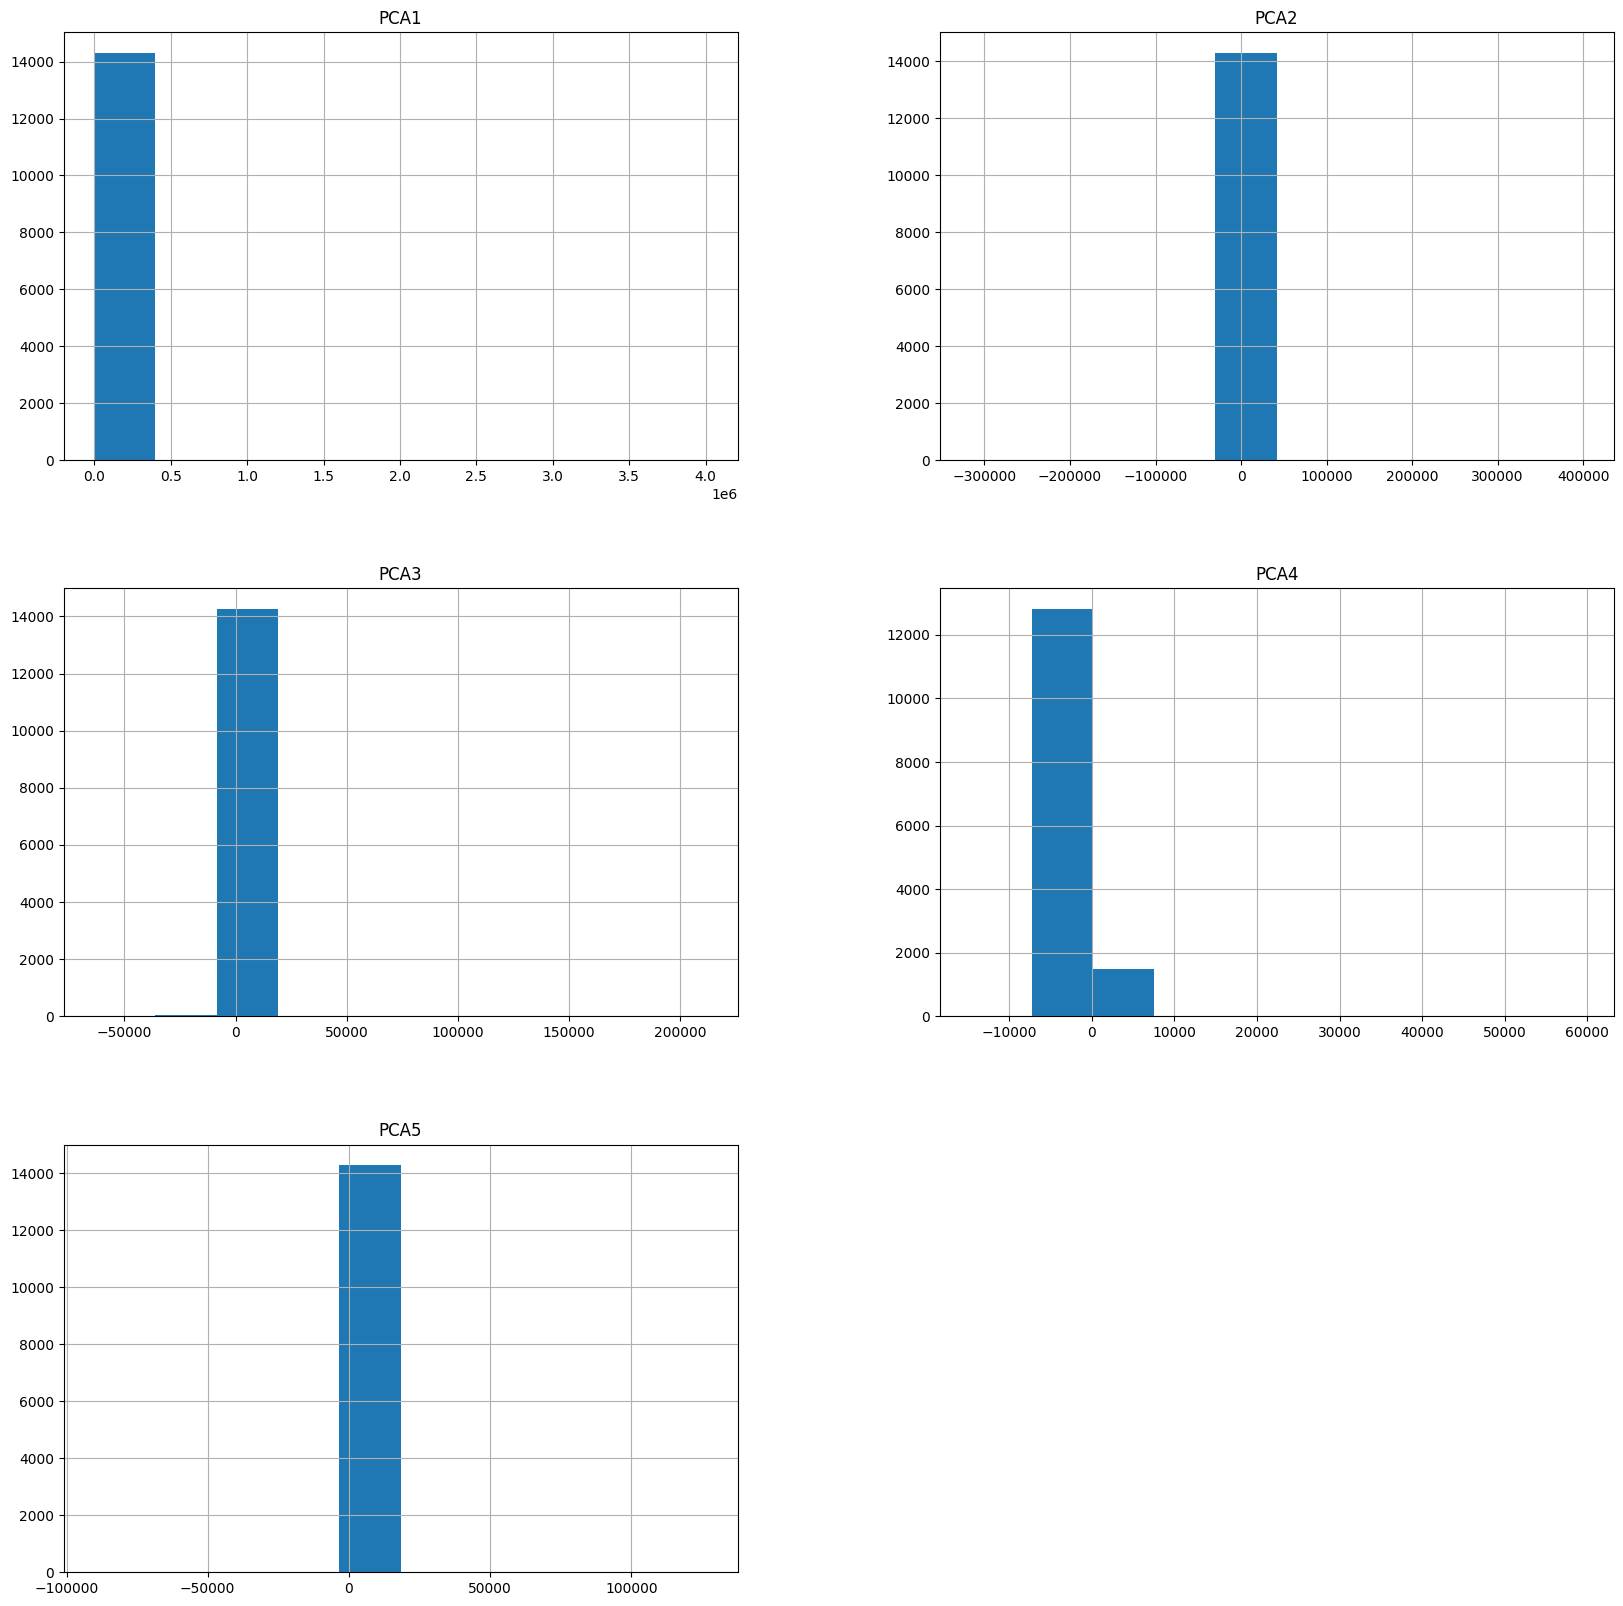

In [18]:
X_test.hist(figsize = (20, 20))
plt.show()

## Grid Search

### Random Forest & Logistic Regression

In [19]:
grid_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10, 20, 50]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'params': {
            'C': [1, 5, 10],
            'max_iter': [100, 200]
        }
    }
}

In [21]:
scores = []

for model_name, mp in grid_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 3, return_train_score = False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

d:\Apps\Conda\envs\tf_steam\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Apps\Conda\envs\tf_steam\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Apps\Conda\envs\tf_steam\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Apps\Conda\envs\tf_steam\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Apps\Conda\envs\tf_steam\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Apps\Conda\envs\tf_steam\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, in

In [22]:
grid_scores = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

In [23]:
grid_scores

,model,best_score,best_params
0,random_forest,0.594748,{'n_estimators': 20}
1,logistic_regression,0.487804,"{'C': 1, 'max_iter': 200}"


### Artificial Neuronal Network 

In [24]:
def create_model(optimizer='adam', init='uniform'):
    model = Sequential([
    Dense(64, input_dim = X_train.shape[1], kernel_initializer = init, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(4, activation = 'softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [25]:
param_grid = {
    'batch_size': [10, 20, 30],
    'epochs': [50, 100, 200],
    'optimizer': ['adam', 'rmsprop'],
    'init': ['uniform', 'normal']
}

In [26]:
model = KerasClassifier(build_fn=create_model, verbose=0)

C:\Users\pms_l\AppData\Local\Temp\ipykernel_370604\2566461152.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [27]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

: 

In [ ]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.6753967801729838 using {'batch_size': 30, 'epochs': 200, 'init': 'normal', 'optimizer': 'rmsprop'}


In [ ]:
# save model
model = grid_result.best_estimator_.model
model.save('nn_model.h5')

NameError: name 'grid_result' is not defined